# Predict outcomes of shelter pets

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataurl = '/Users/dbricare/Documents/Python/datasets/shelter-outcomes/'
df = pd.read_csv(dataurl+'train.csv', sep=',', encoding='utf-8')

In [3]:
print('(Rows, Columns):',df.shape)
df.head()

(Rows, Columns): (26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [88]:
# Are all outcome types known? Are there any NaN values?

df['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [4]:
df['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years', nan,
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

## Convert age text to days (integers)

In [3]:
serages = df['AgeuponOutcome'][df['AgeuponOutcome'].notnull()]
keys = sorted(list(serages.str.extract('(\w+$)', expand=False).unique()))
print(keys)

['day', 'days', 'month', 'months', 'week', 'weeks', 'year', 'years']


In [4]:
# create dictionary for conversion

vals = [1,1,365//12,365//12,7,7,365,365]
dperiod = dict(zip(keys,vals))
print(dperiod)

{'year': 365, 'week': 7, 'months': 30, 'month': 30, 'day': 1, 'weeks': 7, 'years': 365, 'days': 1}


In [160]:
def convage(age):
    dperiod = {'month': 30, 'year': 365, 'years': 365, 'day': 1, 'days': 1, 'weeks': 7, 'week': 7, 'months': 30}
    if isinstance(age, float):
        return age
    else:
        num = int(re.match('\d+',age).group())
        period = re.search('\w+$', age).group()
        return float(num*dperiod[period])

In [6]:
df['AgeDays'] = df['AgeuponOutcome'].apply(convage)
df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0


## Fill NA values for gender/fixed status if necessary

In [85]:
df['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [105]:
# df['SexuponOutcome'].fillna(value='Unknown', inplace=True)
# df['SexuponOutcome'].unique()

## Explore breeds

In [89]:
# Are all animal types identified?

df['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [91]:
len(df['Breed'][df['AnimalType']=='Dog'].unique())

1320

In [96]:
# Are all dog and cat breeds identified?

len(df['Breed'][df['Breed'].isnull()])

0

## Explore animal color

In [98]:
len(df['Color'].unique())

366

In [100]:
len(df['Color'][df['Color'].isnull()])

0

## Explore outcome subtypes

In [102]:
df['OutcomeSubtype'].unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

## Model without considering datetime

In [224]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [221]:
df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color',
       'AgeDays'],
      dtype='object')

In [8]:
Xcols = ['Name', 'AnimalType', 'SexuponOutcome', 'Breed', 'Color']
dfX = df[Xcols].fillna(value='NA', axis=1, inplace=False)
dfX['AgeDays'] = df['AgeDays'].fillna(value=-1, inplace=False)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,Hambone,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365.0
1,Emily,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365.0
2,Pearce,Dog,Neutered Male,Pit Bull Mix,Blue/White,730.0
3,NA,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21.0
4,NA,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730.0


In [9]:
# Convert each categorical feature to integers to use in onehotencoder

def catconv(dfX, first=False):
    if first:
        dohe = {}
        for col in dfX.columns[:-1]:
            if col=='Name':
                d = {'NA':0}
                dohe[col] = d
            else:
                l = list(dfX[col].unique())
                d = dict(zip(l,list(range(len(l))))) 
                dohe[col] = d
            dfX[col] = dfX[col].apply(lambda x: d.get(x, 1))
        return dfX, dohe
    else:
        for col in dfX.columns[:-1]:
            if col=='Name':
                d = {'NA':0}
            else:
                l = list(dfX[col].unique())
                d = dict(zip(l,list(range(len(l)))))
            dfX[col] = dfX[col].apply(lambda x: d.get(x, 1))
        return dfX

dfX, dohe = catconv(dfX, first=True)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,1,0,0,0,0,365.0
1,1,1,1,1,1,365.0
2,1,0,0,2,2,730.0
3,0,1,2,1,3,21.0
4,0,0,0,3,4,730.0


In [249]:
print(dohe.keys())

dict_keys(['Breed', 'Color', 'SexuponOutcome', 'Name', 'AnimalType'])


In [10]:
ohe = OneHotEncoder(categorical_features=np.array([1,1,1,1,1,0],dtype='bool'))
dfintX = ohe.fit_transform(dfX)
dfintX

<26729x1757 sparse matrix of type '<class 'numpy.float64'>'
	with 160352 stored elements in COOrdinate format>

In [13]:
# Convert outcomes to integer classes

ly = list(df['OutcomeType'].unique())
dy = dict(zip(ly,list(range(len(ly))))) 
sery = df['OutcomeType'].apply(lambda x: dy[x])
# sery = df['OutcomeType']
# sery.head()
dy

{'Adoption': 2,
 'Died': 4,
 'Euthanasia': 1,
 'Return_to_owner': 0,
 'Transfer': 3}

In [14]:
# Check outcome type distribution

from collections import Counter
c = Counter(df['OutcomeType'].tolist())
print(c)

Counter({'Adoption': 10769, 'Transfer': 9422, 'Return_to_owner': 4786, 'Euthanasia': 1555, 'Died': 197})


In [15]:
# Begin with logistic regression
from sklearn.linear_model import LogisticRegressionCV

In [280]:
logregcv = LogisticRegressionCV(Cs=[0.1, 1, 3, 10, 30, 100], class_weight='balanced', max_iter=200, tol=0.001,
                                cv=3, solver='newton-cg', scoring='log_loss', n_jobs=3, multi_class='multinomial')

In [281]:
logregcv.fit(dfintX, sery)

/usr/local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:193: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:193: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:193: UserWarning: Line Search fail

LogisticRegressionCV(Cs=[0.1, 1, 3, 10, 30, 100], class_weight='balanced',
           cv=3, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=200, multi_class='multinomial', n_jobs=3, penalty='l2',
           random_state=None, refit=True, scoring='log_loss',
           solver='newton-cg', tol=0.001, verbose=0)

In [282]:
logregcv.n_iter_

array([[[50, 33, 42, 40, 74, 74],
        [52, 33, 27, 39, 45, 87],
        [48, 32, 28, 37, 55, 59]]], dtype=int32)

In [283]:
logregcv.C_

array([ 10.,  10.,  10.,  10.,  10.])

In [287]:
logregcv.scores_

{0: array([[-1.32408727, -1.29912663, -1.29374981, -1.29284077, -1.29542996,
         -1.30080323],
        [-1.32105567, -1.29166654, -1.28452852, -1.28229673, -1.28395059,
         -1.2884154 ],
        [-1.31352382, -1.2842113 , -1.27842737, -1.27793753, -1.28130132,
         -1.2877212 ]]),
 1: array([[-1.32408727, -1.29912663, -1.29374981, -1.29284077, -1.29542996,
         -1.30080323],
        [-1.32105567, -1.29166654, -1.28452852, -1.28229673, -1.28395059,
         -1.2884154 ],
        [-1.31352382, -1.2842113 , -1.27842737, -1.27793753, -1.28130132,
         -1.2877212 ]]),
 2: array([[-1.32408727, -1.29912663, -1.29374981, -1.29284077, -1.29542996,
         -1.30080323],
        [-1.32105567, -1.29166654, -1.28452852, -1.28229673, -1.28395059,
         -1.2884154 ],
        [-1.31352382, -1.2842113 , -1.27842737, -1.27793753, -1.28130132,
         -1.2877212 ]]),
 3: array([[-1.32408727, -1.29912663, -1.29374981, -1.29284077, -1.29542996,
         -1.30080323],
        [-1.

### Load test data

In [90]:
# Define function to transfer test set same as train set

dftest = pd.read_csv(dataurl+'test.csv', sep=',', encoding='utf-8')
dftest.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [92]:
# Convert test data

dperiod = {'month': 30, 'year': 365, 'years': 365, 'day': 1, 'days': 1, 'weeks': 7, 'week': 7, 'months': 30}
dfXtest = dftest[Xcols].fillna(value='NA', axis=1, inplace=False)
dfXtest['AgeDays'] = dftest['AgeuponOutcome'].apply(convage)
dfXtest['AgeDays'] = dfXtest['AgeDays'].fillna(value=-1, inplace=False)
dfXtest = catconv(dfXtest)
# dfintXtest = ohe.transform(dfXtest)

In [93]:
dfXtest.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,1,0,0,0,0,300.0
1,1,0,1,1,1,730.0
2,1,1,2,2,2,365.0
3,1,0,3,3,3,120.0
4,1,0,2,4,4,730.0


In [288]:
yprob = logregcv.predict_proba(dfintXtest)
ypred = logregcv.predict(dfintXtest)

In [315]:
dfres = pd.concat([dftest['ID'],pd.DataFrame(yprob)], axis=1)

In [317]:
dyrev = {item[1]: item[0] for item in dy.items()}
dfres.columns = [dyrev.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.362637,0.001650,0.095903,0.361574,0.178235
1,2,0.584785,0.023943,0.059728,0.198798,0.132747
2,3,0.008266,0.169402,0.604488,0.053586,0.164258
3,4,0.106831,0.020783,0.023827,0.005722,0.842836
4,5,0.038472,0.008211,0.054983,0.029360,0.868973


In [318]:
dfres.to_csv('submission01.csv', sep=',', encoding='utf-8', index=False)

In [314]:
dfres.shape

(11456, 6)

## Evaluate performance of regularized logistic regression

In [243]:
from sklearn.cross_validation import StratifiedShuffleSplit, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score
from scipy import sparse

In [17]:
sss = StratifiedShuffleSplit(sery, test_size=0.33, random_state=42, n_iter=1)

In [18]:
sss

StratifiedShuffleSplit(labels=[0 1 2 ..., 2 3 3], n_iter=1, test_size=0.33, random_state=42)

In [19]:
for train_index, test_index in sss:
    X_train, X_test = dfintX.todense()[train_index], dfintX.todense()[test_index]
    y_train, y_test = sery.iloc[train_index], sery.iloc[test_index]

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17909, 1757) (8820, 1757) (17909,) (8820,)


In [21]:
logregclass = LogisticRegressionCV(Cs=[0.1, 1, 3, 10, 30, 100], class_weight='balanced', max_iter=200, tol=0.001,
                                cv=3, solver='newton-cg', scoring='log_loss', n_jobs=3, multi_class='multinomial')

In [25]:
Xsparse = sparse.csr_matrix(X_train)
logregclass.fit(Xsparse, y_train)

/usr/local/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.5/site-packages/sklearn/utils/optimize.py:193: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegressionCV(Cs=[0.1, 1, 3, 10, 30, 100], class_weight='balanced',
           cv=3, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=200, multi_class='multinomial', n_jobs=3, penalty='l2',
           random_state=None, refit=True, scoring='log_loss',
           solver='newton-cg', tol=0.001, verbose=0)

In [26]:
ypred = logregclass.predict(sparse.csr_matrix(X_test))

In [34]:
print('Accuracy:', '{:.2%}'.format(accuracy_score(y_test, ypred)))
print(classification_report(y_test, ypred))

Accuracy: 49.43%
             precision    recall  f1-score   support

          0       0.40      0.53      0.46      1579
          1       0.23      0.37      0.29       513
          2       0.67      0.69      0.68      3554
          3       0.75      0.28      0.40      3109
          4       0.02      0.38      0.04        65

avg / total       0.62      0.49      0.51      8820



## Performance improvements

In [38]:
# Does test data contain any unnamed animals? Relative to train data?

c1 = Counter(dfXtest['Name'].tolist())
print('Test:',c1)
c2 = Counter(dfX['Name'].tolist())
print('Train:',c2)

Test: Counter({1: 8231, 0: 3225})
Train: Counter({1: 19038, 0: 7691})


In [45]:
# Classes are dramatically unbalanced, very few outcomes for 'Died' and only a few for 'Euthanasia'

## Incorporate datetime and use random forest model

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
def dtdf(dfX, df):
    dfX['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True)
    # Create features for year, month, day, dayofweek, hour, minute
    dfX['Year'] = dfX['DateTime'].dt.year
    dfX['Month'] = dfX['DateTime'].dt.month
    dfX['WeekofYear'] = dfX['DateTime'].dt.weekofyear
    dfX['Day'] = dfX['DateTime'].dt.day
    dfX['DayofWeek'] = dfX['DateTime'].dt.dayofweek
    dfX['Hour'] = dfX['DateTime'].dt.hour
    dfX['Minute'] = dfX['DateTime'].dt.minute
    dfX.drop('DateTime', axis=1, inplace=True)
    return dfX

dfX = dtdf(dfX, df)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays,Year,Month,WeekofYear,Day,DayofWeek,Hour,Minute
0,1,0,0,0,0,365.0,2014,2,7,12,2,18,22
1,1,1,1,1,1,365.0,2013,10,41,13,6,12,44
2,1,0,0,2,2,730.0,2015,1,5,31,5,12,28
3,0,1,2,1,3,21.0,2014,7,28,11,4,19,9
4,0,0,0,3,4,730.0,2013,11,46,15,4,12,52


In [52]:
ohe = OneHotEncoder(categorical_features=np.array([1,1,1,1,1,0,1,1,1,1,1,1,1],dtype='bool'))
dfintX = ohe.fit_transform(dfX)
dfintX

<26729x1944 sparse matrix of type '<class 'numpy.float64'>'
	with 347455 stored elements in COOrdinate format>

In [54]:
rfc = RandomForestClassifier(max_depth=4, n_jobs=3, class_weight='balanced')

In [55]:
rfc.fit(dfintX, sery)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluate performance of random forest

In [96]:
dfXtest = dtdf(dfXtest, dftest)
print(dfXtest.shape)
dfXtest.head()

(11456, 13)


,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays,Year,Month,WeekofYear,Day,DayofWeek,Hour,Minute
0,1,0,0,0,0,300.0,2015,10,42,12,0,12,15
1,1,0,1,1,1,730.0,2014,7,30,26,5,17,59
2,1,1,2,2,2,365.0,2016,1,2,13,2,12,20
3,1,0,3,3,3,120.0,2013,12,52,28,5,18,12
4,1,0,2,4,4,730.0,2015,9,39,24,3,17,59


In [76]:
sss = StratifiedShuffleSplit(sery, test_size=0.33, random_state=42, n_iter=1)
for train_index, test_index in sss:
    X_train, X_test = dfintX.todense()[train_index], dfintX.todense()[test_index]
    y_train, y_test = sery.iloc[train_index], sery.iloc[test_index]

Xtrainsparse = sparse.csr_matrix(X_train)
Xtestsparse = sparse.csr_matrix(X_test)
    
print(classification_report(y_test, ypred))

In [84]:
ests = [10, 50, 100, 200]
depths = [None, 16, 32, 64, 128]

accs = {}
f1s = {}
for est in ests:
    for depth in depths:
        rfeval = RandomForestClassifier(n_estimators=est, max_depth=depth, max_features='sqrt', min_samples_split=1,
                                        n_jobs=3, class_weight='balanced', random_state=42)
        rfeval.fit(Xtrainsparse, y_train)
        ypred = rfeval.predict(Xtestsparse)
        acc = accuracy_score(y_test, ypred)
        f1 = f1_score(y_test, ypred, average='weighted')
        accs[acc] = (est,depth)
        f1s[f1] = (est,depth)
        print('Estimators/max depth:',est,depth)
        print('Accuracy:', '{:.2%}'.format(acc))
        print('F1:', '{:.2%}'.format(f1))
        print('')

Estimators/max depth: 10 None
Accuracy: 63.98%
F1: 62.52%

Estimators/max depth: 10 16
Accuracy: 57.27%
F1: 58.72%

Estimators/max depth: 10 32
Accuracy: 61.95%
F1: 61.84%

Estimators/max depth: 10 64
Accuracy: 64.20%
F1: 62.67%

Estimators/max depth: 10 128
Accuracy: 63.97%
F1: 62.51%

Estimators/max depth: 50 None
Accuracy: 67.95%
F1: 65.37%

Estimators/max depth: 50 16
Accuracy: 59.31%
F1: 60.48%

Estimators/max depth: 50 32
Accuracy: 65.40%
F1: 65.03%

Estimators/max depth: 50 64
Accuracy: 67.59%
F1: 65.21%

Estimators/max depth: 50 128
Accuracy: 67.64%
F1: 65.01%

Estimators/max depth: 100 None
Accuracy: 67.85%
F1: 65.07%

Estimators/max depth: 100 16
Accuracy: 59.13%
F1: 60.35%

Estimators/max depth: 100 32
Accuracy: 66.08%
F1: 65.62%

Estimators/max depth: 100 64
Accuracy: 67.95%
F1: 65.64%

Estimators/max depth: 100 128
Accuracy: 68.06%
F1: 65.30%

Estimators/max depth: 200 None
Accuracy: 67.65%
F1: 64.81%

Estimators/max depth: 200 16
Accuracy: 59.58%
F1: 60.86%

Estimators/ma

In [86]:
print(accs[max(accs.keys())], f1s[max(f1s.keys())])

(200, 64) (200, 32)


In [87]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=64, max_features='sqrt', min_samples_split=1,
                                        n_jobs=3, class_weight='balanced', random_state=42)
rfc.fit(dfintX, sery)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=64, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=1,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=3,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [104]:
dfintXtest = ohe.transform(dfXtest)
yprob = rfc.predict_proba(dfintXtest)

In [105]:
dyrev = {item[1]: item[0] for item in dy.items()}
dfres = pd.concat([dftest['ID'],pd.DataFrame(yprob)], axis=1)
dfres.columns = [dyrev.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
dfres.to_csv('submission02.csv', sep=',', encoding='utf-8', index=False)
dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.379843,0.000,0.013396,0.232863,0.373898
1,2,0.668518,0.005,0.019324,0.224183,0.082975
2,3,0.265000,0.025,0.070000,0.230000,0.410000
3,4,0.246041,0.005,0.020260,0.172211,0.556487
4,5,0.186629,0.000,0.106079,0.499593,0.207699


In [108]:
# Relative feature importance
rfc.feature_importances_.shape

(1944,)

___
## Redo breed info and minute
___

In [2]:
dataurl = '/Users/dbricare/Documents/Python/datasets/shelter-outcomes/'
df = pd.read_csv(dataurl+'train.csv', sep=',', encoding='utf-8')
ly = list(df['OutcomeType'].unique())
dy = dict(zip(ly,list(range(len(ly))))) 
sery = df['OutcomeType'].apply(lambda x: dy[x])
df.head(10)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


In [3]:
def sexfill(df):
    df['SexuponOutcome'].fillna('Unknown', inplace=True)
    assert(set(df['SexuponOutcome'])=={'Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 
                                       'Unknown'})
    return df

def convage(age):
    dperiod = {'month': 30, 'year': 365, 'years': 365, 'day': 1, 'days': 1, 'weeks': 7, 'week': 7, 'months': 30}
    if isinstance(age, float):
        return age
    else:
        num = int(re.match('\d+',age).group())
        period = re.search('\w+$', age).group()
        return float(num*dperiod[period])

def agedays(df, normalize=False):
    Xcols = ['Name', 'AnimalType', 'SexuponOutcome', 'Breed', 'Color']
    dfX = df[Xcols].fillna(value='NA', axis=1, inplace=False)
    dfX['AgeDays'] = df['AgeuponOutcome'].apply(convage)
    dfX['AgeDays'] = dfX['AgeDays'].fillna(value=dfX['AgeDays'].median(), inplace=False)
    if normalize:
        ss = StandardScaler(with_mean=False)
        dfX['AgeDays'] = ss.fit_transform(dfX['AgeDays'].values.reshape(-1,1))
    return dfX

In [4]:
dfX = sexfill(df)
dfX = agedays(dfX)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,Hambone,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,365.0
1,Emily,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,365.0
2,Pearce,Dog,Neutered Male,Pit Bull Mix,Blue/White,730.0
3,NA,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,21.0
4,NA,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730.0


In [5]:
def colorextract(dfX):
    dfX['Color'] = dfX['Color'].str.extract('^(\w+)', expand=False)
    return dfX

In [6]:
dfX = colorextract(dfX)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,Hambone,Dog,Neutered Male,Shetland Sheepdog Mix,Brown,365.0
1,Emily,Cat,Spayed Female,Domestic Shorthair Mix,Cream,365.0
2,Pearce,Dog,Neutered Male,Pit Bull Mix,Blue,730.0
3,NA,Cat,Intact Male,Domestic Shorthair Mix,Blue,21.0
4,NA,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,730.0


In [7]:
# Process breed, categories: pit and chihuahua, pit or mix, chihuahua or mix, purebreed, other mix
# For both cats and dogs

def breedconv(breed):
    if 'pit bull' in breed and 'chihuahua' in breed:
        return 4
    elif 'pitbull' in breed:
        return 3
    elif 'chihuahua' in breed:
        return 2
    elif '/' not in breed and 'mix' not in breed:
        return 1
    else:
        return 0
    
def breed(dfX):
    dfX['Breed'] = dfX['Breed'].apply(breedconv)
    return dfX

dfX = breed(dfX)
dfX.head(10)

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,Hambone,Dog,Neutered Male,1,Brown,365.0
1,Emily,Cat,Spayed Female,1,Cream,365.0
2,Pearce,Dog,Neutered Male,1,Blue,730.0
3,NA,Cat,Intact Male,1,Blue,21.0
4,NA,Dog,Neutered Male,0,Tan,730.0
5,Elsa,Dog,Intact Female,0,Black,30.0
6,Jimmy,Cat,Intact Male,1,Blue,21.0
7,NA,Cat,Unknown,1,Brown,21.0
8,Lucy,Dog,Spayed Female,1,Red,150.0
9,NA,Dog,Spayed Female,1,White,365.0


In [8]:
def catconv(dfX, cols, first=False):
    if first:
        dohe = {}
        for col in cols:
            if col=='Name':
                d = {'NA':0}
                dohe[col] = d
            else:
                l = list(dfX[col].unique())
                d = dict(zip(l,list(range(len(l))))) 
                dohe[col] = d
            dfX[col] = dfX[col].apply(lambda x: d.get(x, 1))
        return dfX, dohe
    else:
        for col in cols:
            if col=='Name':
                d = {'NA':0}
            else:
                l = list(dfX[col].unique())
                d = dict(zip(l,list(range(len(l)))))
            dfX[col] = dfX[col].apply(lambda x: d.get(x, 1))
        return dfX

dfX, dohe = catconv(dfX, ['Name', 'AnimalType', 'SexuponOutcome', 'Color'],first=True)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays
0,1,0,0,1,0,365.0
1,1,1,1,1,1,365.0
2,1,0,0,1,2,730.0
3,0,1,2,1,2,21.0
4,0,0,0,0,3,730.0


In [9]:
# Parse dates but do not include minutes

def minconv(minute):
    if minute==0:
        return 0
    else:
        return 1

def dtdf(dfX, df):
    dfX['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True)
    # Create features for year, month, day, dayofweek, hour, minute
    dfX['Year'] = dfX['DateTime'].dt.year
    dfX['Month'] = dfX['DateTime'].dt.month
    dfX['WeekofYear'] = dfX['DateTime'].dt.weekofyear
    dfX['DayofMonth'] = dfX['DateTime'].dt.day
    dfX['DayofWeek'] = dfX['DateTime'].dt.dayofweek
    dfX['Hour'] = dfX['DateTime'].dt.hour
    dfX['Minute'] = dfX['DateTime'].dt.minute.apply(minconv)
    dfX.drop('DateTime', axis=1, inplace=True)
    return dfX

In [10]:
dfX = dtdf(dfX, df)
dfX.head()

,Name,AnimalType,SexuponOutcome,Breed,Color,AgeDays,Year,Month,WeekofYear,DayofMonth,DayofWeek,Hour,Minute
0,1,0,0,1,0,365.0,2014,2,7,12,2,18,1
1,1,1,1,1,1,365.0,2013,10,41,13,6,12,1
2,1,0,0,1,2,730.0,2015,1,5,31,5,12,1
3,0,1,2,1,2,21.0,2014,7,28,11,4,19,1
4,0,0,0,0,3,730.0,2013,11,46,15,4,12,1


## Random forest with one hot encoding

In [55]:
# Convert integer-identified categories into one-hot encodings
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=np.array([1,1,1,1,0,1,1,1,1,1,1],dtype='bool'))
dfintX = ohe.fit_transform(dfX)
dfintX

<26729x164 sparse matrix of type '<class 'numpy.float64'>'
	with 293997 stored elements in COOrdinate format>

In [56]:
# Divide dataset into train and test

# sss = StratifiedShuffleSplit(sery, test_size=0.25, random_state=42, n_iter=1)
# for train_index, test_index in sss:
#     X_train, X_test = dfintX.todense()[train_index], dfintX.todense()[test_index]
#     y_train, y_test = sery.iloc[train_index], sery.iloc[test_index]

In [57]:
# Use gridsearch to find best parameters minus held out data

params = {'n_estimators' : [50,100,200], 'max_depth' : [8,16,32]}

clf = RandomForestClassifier(max_features='sqrt',
                             n_jobs=3, class_weight='balanced', random_state=42)

grid = GridSearchCV(clf, param_grid=params, cv=3, scoring='log_loss')
grid.fit(dfintX, sery)

grid.grid_scores_

[mean: -1.18332, std: 0.00541, params: {'n_estimators': 50, 'max_depth': 8},
 mean: -1.18332, std: 0.00165, params: {'n_estimators': 100, 'max_depth': 8},
 mean: -1.18409, std: 0.00108, params: {'n_estimators': 200, 'max_depth': 8},
 mean: -0.93533, std: 0.00564, params: {'n_estimators': 50, 'max_depth': 16},
 mean: -0.93144, std: 0.00241, params: {'n_estimators': 100, 'max_depth': 16},
 mean: -0.93140, std: 0.00268, params: {'n_estimators': 200, 'max_depth': 16},
 mean: -0.88226, std: 0.01283, params: {'n_estimators': 50, 'max_depth': 32},
 mean: -0.83445, std: 0.01778, params: {'n_estimators': 100, 'max_depth': 32},
 mean: -0.81492, std: 0.01452, params: {'n_estimators': 200, 'max_depth': 32}]

**Make prediction**

In [58]:
# Chain of functions to format data (agedays, breedconv, catconv, dtdf, ohe)

def testconv(df):
    dfX = agedays(df)
    dfX = sexfill(dfX)
    dfX = colorextract(dfX)
    dfX = breed(dfX)
    dfX = catconv(dfX, ['Name', 'AnimalType', 'SexuponOutcome', 'Color'])
    dfX = dtdf(dfX, df)
    return dfX

In [59]:
# Load test data and format

dftest = pd.read_csv(dataurl+'test.csv', sep=',', encoding='utf-8')
dfXtest = testconv(dftest)
dfXtest.drop('Year', axis=1, inplace=True)
dfXtest.drop('Breed', axis=1, inplace=True)
dfintXtest = ohe.transform(dfXtest).toarray()

In [62]:
# Calculate probabilities and save

clf.set_params(**grid.best_params_)
# clf.set_params(n_estimators=200, max_depth=32)
clf.fit(dfintX, sery)

yprob = clf.predict_proba(dfintXtest)

dyrev = {item[1]: item[0] for item in dy.items()}
dfres = pd.concat([dftest['ID'],pd.DataFrame(yprob)], axis=1)
dfres.columns = [dyrev.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
dfres.to_csv('submission10.csv', sep=',', encoding='utf-8', index=False)

dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.414607,0.000000,0.026537,0.222796,0.336060
1,2,0.583223,0.005000,0.012442,0.340294,0.059042
2,3,0.209000,0.010000,0.055510,0.097462,0.628027
3,4,0.154348,0.000000,0.024720,0.248839,0.572093
4,5,0.042624,0.000181,0.347095,0.492059,0.118041


## Repeat without one hot encoding

In [19]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import log_loss, classification_report

In [48]:
# Chain of functions to format data (agedays, breedconv, catconv, dtdf, ohe)

def testconv(df):
    dfX = agedays(df)
    dfX = colorextract(dfX)
    dfX = breed(dfX)
    dfX = catconv(dfX, ['Name', 'AnimalType', 'SexuponOutcome', 'Color'])
    dfX = dtdf(dfX, df)
    return dfX

dfX = testconv(df)
dfX.drop('Year', axis=1, inplace=True)
dfX.drop('Breed', axis=1, inplace=True)
dfX.head()

,Name,AnimalType,SexuponOutcome,Color,AgeDays,Month,WeekofYear,DayofMonth,DayofWeek,Hour,Minute
0,1,0,0,0,365.0,2,7,12,2,18,1
1,1,1,1,1,365.0,10,41,13,6,12,1
2,1,0,0,2,730.0,1,5,31,5,12,1
3,0,1,2,2,21.0,7,28,11,4,19,1
4,0,0,0,3,730.0,11,46,15,4,12,1


In [49]:
# Divide dataset into train and test


sss = StratifiedShuffleSplit(sery, test_size=0.25, random_state=42, n_iter=1)
for train_index, test_index in sss:
    X_train, X_test = dfX.iloc[train_index], dfX.iloc[test_index]
    y_train, y_test = sery.iloc[train_index], sery.iloc[test_index]

In [50]:
# Use gridsearch to find best parameters minus held out data


params = {'n_estimators' : [50,100,200], 'max_depth' : [8,16,32]}

clf = RandomForestClassifier(max_features='sqrt',
                             n_jobs=3, class_weight='balanced', random_state=42)

grid = GridSearchCV(clf, param_grid=params, cv=3, scoring='log_loss')
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)
grid.grid_scores_

{'n_estimators': 200, 'max_depth': 16} -0.813701375835


[mean: -0.94538, std: 0.00558, params: {'n_estimators': 50, 'max_depth': 8},
 mean: -0.94394, std: 0.00502, params: {'n_estimators': 100, 'max_depth': 8},
 mean: -0.94431, std: 0.00441, params: {'n_estimators': 200, 'max_depth': 8},
 mean: -0.87885, std: 0.00483, params: {'n_estimators': 50, 'max_depth': 16},
 mean: -0.83308, std: 0.01875, params: {'n_estimators': 100, 'max_depth': 16},
 mean: -0.81370, std: 0.00813, params: {'n_estimators': 200, 'max_depth': 16},
 mean: -1.08496, std: 0.02737, params: {'n_estimators': 50, 'max_depth': 32},
 mean: -0.92444, std: 0.01793, params: {'n_estimators': 100, 'max_depth': 32},
 mean: -0.85819, std: 0.01838, params: {'n_estimators': 200, 'max_depth': 32}]

In [51]:
# Evaluate model performance on test data

ypred = grid.predict_proba(X_test)
print(log_loss(y_test, ypred))
# print(classification_report(y_test, grid.predict(X_test)))

# print(np.unique(y_test), np.unique(grid.predict(X_test)))

0.847430776362


In [52]:
# Train on whole dataset with best params from cv

clf.set_params(**grid.best_params_)
_ = clf.fit(dfX, sery)

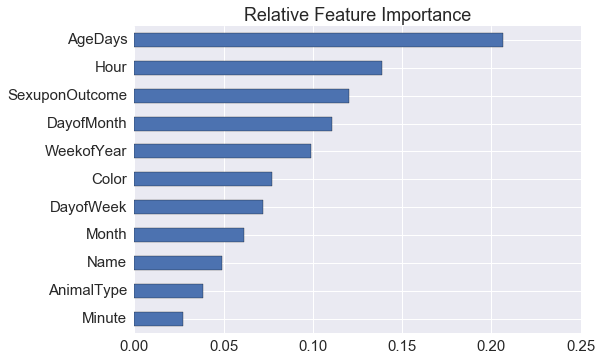

In [53]:
sns.set(font_scale=1.5)
serfeatures = pd.Series(clf.feature_importances_, index=dfX.columns).sort_values(ascending=True)
_ = serfeatures.plot(kind='barh')
_ = plt.title('Relative Feature Importance')

**Make prediction**

In [54]:
# Load test data and format 

dftest = pd.read_csv(dataurl+'test.csv', sep=',', encoding='utf-8')
dfXtest = testconv(dftest)
dfXtest.drop('Year', axis=1, inplace=True)
dfXtest.drop('Breed', axis=1, inplace=True)

# Calculate probabilities and output
yprob = clf.predict_proba(dfXtest)

dyrev = {item[1]: item[0] for item in dy.items()}
dfres = pd.concat([dftest['ID'],pd.DataFrame(yprob)], axis=1)
dfres.columns = [dyrev.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
dfres.to_csv('submission09.csv', sep=',', encoding='utf-8', index=False)

dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.298755,0.000000,0.024009,0.169527,0.507710
1,2,0.624871,0.011751,0.024026,0.292370,0.046982
2,3,0.073845,0.005000,0.234779,0.072963,0.613413
3,4,0.141651,0.000000,0.030606,0.232249,0.595494
4,5,0.020135,0.000000,0.453558,0.365430,0.160877


## Use gradient/ada boosting and no encoding

In [83]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

In [86]:
# Use grid search to find best parameters

params = {'n_estimators' : [200,300,400], 'max_depth' : [16]}

# clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=42)
clf = ExtraTreesClassifier(max_features='auto', random_state=42)

grid = GridSearchCV(clf, param_grid=params, n_jobs=3, cv=3, scoring='log_loss')
grid.fit(dfX, sery)

print(grid.best_params_)
grid.grid_scores_

{'max_depth': 16, 'n_estimators': 400}


[mean: -0.79044, std: 0.00909, params: {'max_depth': 16, 'n_estimators': 200},
 mean: -0.78782, std: 0.00752, params: {'max_depth': 16, 'n_estimators': 300},
 mean: -0.78655, std: 0.00677, params: {'max_depth': 16, 'n_estimators': 400}]

In [73]:
# Load test data and format 

dftest = pd.read_csv(dataurl+'test.csv', sep=',', encoding='utf-8')
dfXtest = testconv(dftest)

# Calculate probabilities and output
yprob = grid.predict_proba(dfXtest)

dyrev = {item[1]: item[0] for item in dy.items()}
dfres = pd.concat([dftest['ID'],pd.DataFrame(yprob)], axis=1)
dfres.columns = [dyrev.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
dfres.to_csv('submission08.csv', sep=',', encoding='utf-8', index=False)

dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.389857,0.003331,0.014568,0.117467,0.474776
1,2,0.756915,0.002760,0.015764,0.176675,0.047887
2,3,0.042842,0.004040,0.075030,0.093553,0.784535
3,4,0.407859,0.008300,0.034863,0.171480,0.377498
4,5,0.027890,0.004193,0.101097,0.683463,0.183358


## SVM classifier

In [3]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [ ]:
params = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

clf = SVC(class_weight='balanced', kernel='linear', probability=False, random_state=42)

# grid = GridSearchCV(clf, param_grid=params, cv=3, scoring='log_loss', n_jobs=3)
clf.fit(dfX[:100], sery[:100])

# print(grid.best_params_, grid.best_score_)

___
## Label encoder and get dummies
___

In [63]:
from sklearn.preprocessing import LabelEncoder

In [169]:
def convage(age):
    dperiod = {'month': 30, 'year': 365, 'years': 365, 'day': 1, 'days': 1, 'weeks': 7, 'week': 7, 'months': 30}
    if isinstance(age, float):
        return age
    else:
        num = int(re.match('\d+',age).group())
        period = re.search('\w+$', age).group()
        return float(num*dperiod[period])
    
# def breedconv(breed):
#     if 'pit bull' in breed and 'chihuahua' in breed:
#         return 4
#     elif 'pitbull' in breed:
#         return 3
#     elif 'chihuahua' in breed:
#         return 2
#     elif '/' not in breed and 'mix' not in breed:
#         return 1
#     else:
#         return 0

def readdata(trainortest):
    assert(trainortest == 'train' or trainortest == 'test')
    dataurl = '/Users/dbricare/Documents/Python/datasets/shelter-outcomes/'
    df = pd.read_csv(dataurl+trainortest+'.csv', sep=',', encoding='utf-8')
    
    # fill NaN sex values
    df['SexuponOutcome'].fillna('Unknown', inplace=True)
    assert(set(df['SexuponOutcome'])=={'Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 
                                       'Unknown'})
    
    # convert age and drop unneeded columns
    Xcols = ['Name', 'AnimalType', 'SexuponOutcome']
    dfX = df[Xcols] #.fillna(value='NA', axis=1, inplace=False)
    dfX['AgeDays'] = df['AgeuponOutcome'].apply(convage)
    dfX['AgeDays'] = dfX['AgeDays'].fillna(value=dfX['AgeDays'].mean(), inplace=False)
    # if normalize:
    #     ss = StandardScaler(with_mean=False)
    #     dfX['AgeDays'] = ss.fit_transform(dfX['AgeDays'].values.reshape(-1,1))
    # def breed(dfX):
    #     dfX['Breed'] = dfX['Breed'].apply(breedconv)
    #     return dfX
    
    # convert name category to with name and nameless
    dfX['Name'].fillna(0, inplace=True)
    dfX['Name'] = dfX['Name'].apply(lambda x: 0 if x==0 else 1)

    # parse datetime
    dfX['DateTime'] = pd.to_datetime(df['DateTime'], infer_datetime_format=True)
    # Create features for each time interval
    # dfX['Year'] = dfX['DateTime'].dt.year
    dfX['Month'] = dfX['DateTime'].dt.month
    # dfX['WeekofYear'] = dfX['DateTime'].dt.weekofyear
    dfX['DayofMonth'] = dfX['DateTime'].dt.day
    dfX['DayofWeek'] = dfX['DateTime'].dt.dayofweek
    dfX['Hour'] = dfX['DateTime'].dt.hour
    dfX['Minute'] = dfX['DateTime'].dt.minute.apply(lambda x: 0 if x==0 else 1)
    dfX.drop('DateTime', axis=1, inplace=True)
    
    convlist = list(dfX.columns)
    convlist.remove('AgeDays')
    idx = 0
    for col in convlist:
        if idx==0:
            dfdum = pd.get_dummies(dfX[col], dummy_na=False, prefix=col)
            idx = 1
        else:
            dfnew = pd.get_dummies(dfX[col], dummy_na=False, prefix=col)
            dfdum = pd.concat([dfdum,dfnew], axis=1)
    dfdum = pd.concat([dfdum,dfX['AgeDays']], axis=1)
    dfdum[dfdum.columns] = dfdum[dfdum.columns].astype(int)
    
    if trainortest=='train':
        le = LabelEncoder()
        sery = le.fit_transform(df['OutcomeType'])
        dy = dict(zip(list(range(le.classes_.shape[0])),le.classes_))
        return dfdum, sery, dy
    else:
        return dfdum, df['ID']

In [170]:
dfX, sery, dy = readdata('train')
print(dfX.shape)
dfX.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/li

(26729, 82)


,Name_0,Name_1,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Month_1,...,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Minute_0,Minute_1,AgeDays
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,365
1,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,365
2,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,730
3,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,21
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,730


In [182]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import log_loss, classification_report
from scipy import sparse
import datetime

In [156]:
# Divide dataset into train and test

sss = StratifiedShuffleSplit(sery, test_size=0.25, random_state=42, n_iter=1)
for train_index, test_index in sss:
    X_train, X_test = dfX.iloc[train_index], dfX.iloc[test_index]
    y_train, y_test = sery[train_index], sery[test_index]

def sparsity_ratio(X):
    return 1.0 - np.count_nonzero(X) / float(X.shape[0] * X.shape[1])

# sparsify
spratio = sparsity_ratio(X_train.values)
print("Sparsity ratio:", spratio)

if spratio >= 0.9:
    X_train = sparse.csr_matrix(X_train)

print(type(X_train))

Sparsity ratio: 0.8902530282474189
<class 'pandas.core.frame.DataFrame'>


In [177]:
# Use grid search to find best parameters
# moderate logloss improvement of 1000 over 800 (-0.837 for 800)

params = {'n_estimators': [800], 'max_depth': [16,32,64]}

# clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=42)
# clf = ExtraTreesClassifier(max_features='auto', random_state=42)
clf = RandomForestClassifier(random_state=42, n_jobs=3, class_weight='balanced_subsample', oob_score=True)

grid = GridSearchCV(clf, param_grid=params, n_jobs=1, cv=3, scoring='log_loss')
grid.fit(csr_train, y_train)

print(grid.best_params_)
grid.grid_scores_

{'n_estimators': 800, 'max_depth': 32}


[mean: -0.86803, std: 0.00384, params: {'n_estimators': 800, 'max_depth': 16},
 mean: -0.81484, std: 0.00694, params: {'n_estimators': 800, 'max_depth': 32},
 mean: -0.83747, std: 0.00731, params: {'n_estimators': 800, 'max_depth': 64}]

In [178]:
# 800 estimator, None maxdepth (0.79)

ypred = grid.predict_proba(X_test)
print(log_loss(y_test, ypred))

0.781123734621


In [179]:
# Train on whole dataset with best params from cv

clf.set_params(**grid.best_params_)
_ = clf.fit(dfX, sery)

### Load test data for get_dummies rf approach

In [172]:
dfXtest, serID = readdata('test')
print(dftest.shape)
dfXtest.head()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/li

(11456, 82)


,Name_0,Name_1,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,Month_1,...,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Minute_0,Minute_1,AgeDays
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,300
1,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,730
2,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,365
3,0,1,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,120
4,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,730


In [192]:
# Calculate probabilities and output
yprob = clf.predict_proba(dfXtest)

dfres = pd.concat([serID,pd.DataFrame(yprob)], axis=1)
dfres.columns = [dy.get(col, col) for col in dfres.columns]
dfres = dfres[['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer']]
now = datetime.datetime.now()
dfres.to_csv('animalshelter'+now.strftime('%Y%m%d_%H%M')+'.csv', sep=',', encoding='utf-8', index=False)

dfres.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,0.012418,0.000000,0.035172,0.106703,0.845706
1,2,0.745686,0.002247,0.009694,0.198588,0.043785
2,3,0.324648,0.000000,0.018846,0.349500,0.307006
3,4,0.162913,0.000000,0.067491,0.303759,0.465837
4,5,0.572473,0.000586,0.043285,0.341781,0.041875
